<a href="https://colab.research.google.com/github/anhelus/ai-notebook/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
def plot_cm(model, test_images, test_labels, classes=[]):
    """
    Funzione per mostrare la confusion matrix su un modello Keras per la CV.

    Args:
        model: modello Keras da usare per calcolare le predizioni.
        test_images: immagini di test da usare per la predizione.
        test_labels: label associate alle imagini di test.
    """
    predictions = model.predict(test_images)
    result = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
    if len(classes) > 0:
        disp = ConfusionMatrixDisplay(result, display_labels=classes)
    else:
        disp = ConfusionMatrixDisplay(result)
    disp.plot()
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha="right")

Carichiamom il dataset. Questa volta scegliamo il dataset CIFAR10.

In [3]:
dataset = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step


Proviamo ad utilizzare lo stesso modello che abbiaom usato per classificare i vestiti su Fashion MNIST.

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.0992 - loss: 35.5317 - val_accuracy: 0.1001 - val_loss: 2.3039
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.1004 - loss: 2.3029 - val_accuracy: 0.1001 - val_loss: 2.3039
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.1001 - val_loss: 2.3039
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0970 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.1001 - val_loss: 2.3039
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.1009 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.1006 - loss: 2.3028 - val_accuracy: 0.1001 - val_loss: 2.3039
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.1004 - loss: 2.3027 - va

Vedete qualcosa di strano nei valori di loss ed accuracy? Sembra si "fermino", giusto? Vediamo cosa accade con la confusion matrix.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


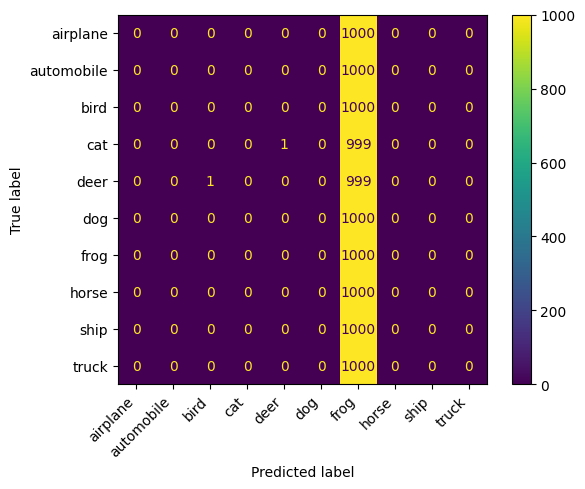

In [11]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_cm(model, test_images, test_labels, classes=classes)

C'è qualcosa che non va! Infatti tutti i valori vengono predetti come *gatti*! Come possiamo fare?

Probabile che ci sia qualcosa che non va nel modello. Proviamo a cambiare qualcosina:

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    tf.keras.layers.Conv2D(32, 3, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1590 - loss: 5.0929 - val_accuracy: 0.3220 - val_loss: 1.8981
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.3204 - loss: 1.8930 - val_accuracy: 0.3478 - val_loss: 1.7962
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3466 - loss: 1.8170 - val_accuracy: 0.3614 - val_loss: 1.7773
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3733 - loss: 1.7477 - val_accuracy: 0.3928 - val_loss: 1.7111
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3908 - loss: 1.7040 - val_accuracy: 0.3715 - val_loss: 1.7487
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3926 - loss: 1.6861 - val_accuracy: 0.4034 - val_loss: 1.7089
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4009 - loss: 1.6778 - val_accuracy: 0.4142 - val_loss: 1.6590
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4136 - loss: 1.6555 - val_accu

In questo caso, la loss sembra diminuire, mentre l'accuracy sembra aumentare. Proviamo a vedere cosa accade con la confusion matrix?

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


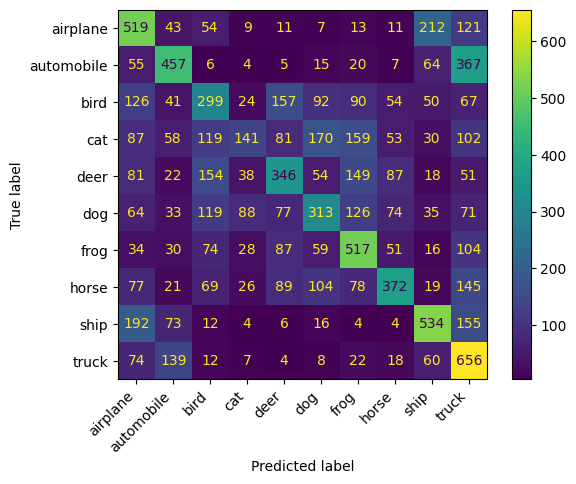

In [13]:
plot_cm(model, test_images, test_labels, classes=classes)

Vi ricordate quando abbiamo provato a far riconoscere le immagini di CIFAR10 al computer usando solo i layer 'dense'? Non funzionava molto bene, vero? La 'loss' (l'errore) non diminuiva molto e la 'confusion matrix' era un disastro. Questo perché i layer 'dense' trattano ogni pixel dell'immagine come una cosa a sé stante. Immaginate di dover riconoscere un gatto, ma invece di guardare la forma delle orecchie, il muso, la coda, guardate solo il colore di ogni singolo puntino (pixel) dell'immagine, uno alla volta. Difficile, no?

**Entra in Scena il Layer Convoluzionale! (La Soluzione)**

Oggi vi presento un superpotere: i layer *convoluzionali*! Invece di guardare ogni pixel singolarmente, questi layer guardano *piccoli gruppi di pixel alla volta* e cercano *pattern* (schemi, forme) interessanti.

**Immaginate questo:**

*   **La lente d'ingrandimento:** Pensate a una piccola lente d'ingrandimento che scorre su tutta l'immagine. Questa lente è chiamata 'filtro'.  Il filtro guarda solo una piccola porzione dell'immagine alla volta, ad esempio un quadratino 3x3 pixel.
*   **Caccia ai pattern:** Ogni filtro è specializzato nel trovare un certo tipo di pattern: un bordo, un angolo, una certa texture, un colore. Quando il filtro trova il pattern che sta cercando, 'si illumina' (produce un valore alto).
*   **Mappa delle caratteristiche:** Il filtro scorre su tutta l'immagine, e alla fine crea una 'mappa delle caratteristiche'. Questa mappa mostra dove quel particolare pattern è presente nell'immagine. Immaginate una mappa che indica dove ci sono bordi verticali, una che indica dove ci sono angoli, ecc.

**Il Codice spiegato:**

Ecco come abbiamo aggiunto questo nuovo "potere" al nostro programma:

```python
model = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    tf.keras.layers.Conv2D(32, 3, 3, activation='relu'), # <---- QUI
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])
```

*   `tf.keras.layers.Conv2D(32, 3, 3, activation='relu')`:  Questa riga è il nostro layer convoluzionale. Dice al computer di usare 32 filtri diversi, ognuno di 3x3 pixel. `relu` è una funzione che aiuta a far risaltare i pattern importanti.
*   `tf.keras.layers.MaxPool2D()`: Serve a ridurre la dimensione delle mappe delle caratteristiche, mantenendo le informazioni più importanti. Immaginate di fare un riassunto della mappa.
* `tf.keras.layers.Flatten()`: Trasforma le mappe delle caratteristiche in un vettore, per poterle dare ai layer 'dense' successivi.
*   `tf.keras.layers.Dense(10)`: I layer 'dense' prendono le caratteristiche estratte dai layer convoluzionali e decidono a quale categoria appartiene l'immagine.
*   `tf.keras.layers.Softmax()`: Restituisce la probabilità che l'immagine appartenga a ciascuna delle 10 categorie.

**Perché Funziona Meglio? (Vantaggi del Layer Convoluzionale)**

I layer convoluzionali funzionano meglio perché:

*   **Vedono le forme, non solo i pixel:** Si concentrano sui pattern e sulle relazioni tra i pixel, proprio come facciamo noi quando riconosciamo un oggetto.
*   **Sono bravi a trovare le stesse cose ovunque siano:** Se un gatto è in alto a sinistra o in basso a destra nell'immagine, i layer convoluzionali lo riconosceranno comunque perché cercano gli stessi pattern ovunque.
*   **Imparano da soli i pattern importanti:** Non dobbiamo dire al computer quali pattern cercare, li impara da solo guardando tante immagini.